In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
data.head(5)


,x1,x2,y
0,0.336494,-0.985951,-1.0
1,-0.011043,-0.105529,1.0
2,0.238160,-0.617417,1.0
3,-0.366783,-0.713819,1.0
4,1.221923,-1.039399,-1.0


In [2]:
import numpy as np
X = np.array(data[['x1','x2']])
y = np.array(data['y'])
print(X)
print(y)

[[ 3.36493584e-01 -9.85950993e-01]
 [-1.10425297e-02 -1.05528562e-01]
 [ 2.38159509e-01 -6.17416665e-01]
 [-3.66782883e-01 -7.13818717e-01]
 [ 1.22192307e+00 -1.03939899e+00]
 [-1.30456800e+00  5.92618470e-01]
 [-4.07809099e-01 -5.09110510e-01]
 [ 8.93188942e-01  1.18285986e+00]
 [-5.46337259e-03 -5.89551229e-01]
 [ 4.06423768e-01  6.11062235e-01]
 [-1.45506767e-01  3.65463997e-02]
 [-4.04887876e-02 -5.66500320e-02]
 [ 1.60355998e+00  9.08139380e-02]
 [-6.04838450e-01 -1.11340205e-01]
 [-5.34401237e-01 -1.04875779e+00]
 [ 9.77706756e-01 -1.35281793e+00]
 [-4.22036925e-01 -2.74418974e-01]
 [ 1.69051345e+00 -9.29766839e-01]
 [ 6.55534595e-01 -2.44533046e-01]
 [ 3.84609916e-01 -3.34328466e-01]
 [-1.09341027e-01  2.73694976e-01]
 [-1.28710022e+00 -4.06756443e-01]
 [ 4.35217566e-01 -1.92221317e-01]
 [ 5.55208008e-02  1.02401188e+00]
 [ 1.50882171e+00 -7.99489053e-01]
 [ 7.59323066e-01  7.75189603e-01]
 [ 9.67078497e-01 -7.07726242e-01]
 [-2.31301769e-02  1.34060202e+00]
 [-2.74591143e-01 -5

In [3]:
np.random.seed(55)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


In [4]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
# It is good to randomize the data before drawing Learning Curves
def randomize(X, Y):
    permutation = np.random.permutation(Y.shape[0])
    X2 = X[permutation,:]
    Y2 = Y[permutation]
    return X2, Y2
X2, y2 = randomize(X, y)
def draw_learning_curves(X, y, estimator, num_trainings,title="Learning Curves"):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X2, y2, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, num_trainings))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    plt.plot(train_scores_mean, 'o-', color="g",
             label="Training score")
    plt.plot(test_scores_mean, 'o-', color="y",
             label="Cross-validation score")


    plt.legend(loc="best")

    plt.show()

In [5]:
### Logistic Regression
estimator_logistic = LogisticRegression()

### Decision Tree
estimator_tree = GradientBoostingClassifier()

### Support Vector Machine
estimator_svc = SVC(kernel='rbf', gamma=1000)

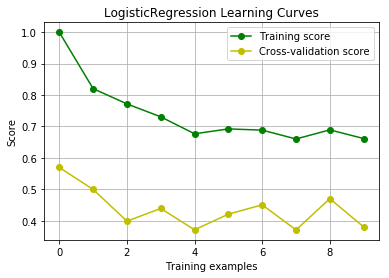

In [6]:
draw_learning_curves(X,y,estimator_logistic,10,'LogisticRegression Learning Curves')

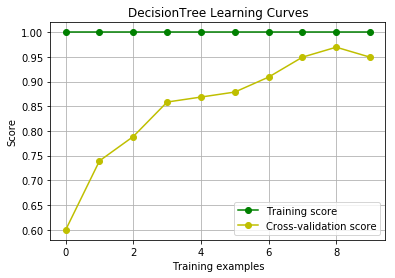

In [31]:
draw_learning_curves(X,y,estimator_tree,10,"DecisionTree Learning Curves")

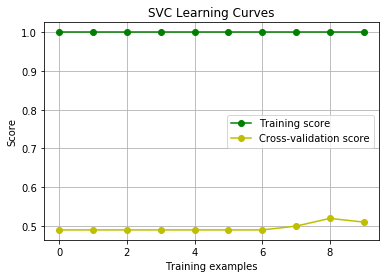

In [30]:
draw_learning_curves(X,y,estimator_svc,10,'SVC Learning Curves')